In [11]:
from surprise import SVD
from surprise.prediction_algorithms import knns
from surprise import Dataset,accuracy
from surprise.model_selection import cross_validate,KFold

### Cross-Validation

In [12]:
# Load the movielens-100k dataset (download it if needed),
data = Dataset.load_builtin('ml-100k')

# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)

# We'll use the famous SVD algorithm.
algo = SVD()

# The other algorithm is KNN algorithm
knnb = knns.KNNBasic()

knnm = knns.KNNWithMeans()

# define a cross-validation iterator
kf = KFold(n_splits=3)

svd_res = []
knnb_res = []
knnm_res = []

for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    svd_res.append(accuracy.rmse(predictions, verbose=True))
    
        # train and test algorithm.
    knnb.fit(trainset)
    predictions = knnb.test(testset)

    # Compute and print Root Mean Squared Error
    knnb_res.append(accuracy.rmse(predictions, verbose=True))
    
        # train and test algorithm.
    knnm.fit(trainset)
    predictions = knnm.test(testset)

    # Compute and print Root Mean Squared Error
    knnm_res.append(accuracy.rmse(predictions, verbose=True))
    

RMSE: 0.9433
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9836
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9526
RMSE: 0.9456
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9883
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9567
RMSE: 0.9480
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9911
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9585


### GridSearchCV

In [ ]:
from surprise.model_selection import GridSearchCV

param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

##  implement gscv for other algorithms



### Inference stage

In [16]:
import collections

algo = gs.best_estimator['rmse']
trainset=data.build_full_trainset()

algo.fit(trainset)

prediction = algo.test(trainset.build_testset())

In [19]:
def get_top_n(predictions, n=10):

    # First map the predictions to each user.
    top_n = collections.defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n


top_n = get_top_n(prediction, n=10)

In [23]:
# Print the recommended items for each user
rec_ls={}
for uid, user_ratings in top_n.items():
    rec_ls[uid]=[iid for (iid, _) in user_ratings]
    print(uid, [iid for (iid, _) in user_ratings])

196 ['285', '251', '173', '1007', '242', '269', '8', '306', '663', '655']
186 ['12', '98', '302', '100', '79', '56', '269', '306', '177', '203']
22 ['50', '127', '174', '515', '511', '172', '187', '89', '173', '651']
244 ['169', '318', '64', '114', '50', '357', '174', '172', '89', '191']
166 ['313', '315', '258', '286', '300', '346', '347', '751', '328', '288']
298 ['318', '483', '603', '178', '50', '357', '127', '174', '98', '134']
115 ['12', '178', '50', '357', '127', '174', '657', '98', '511', '172']
253 ['318', '64', '483', '12', '50', '127', '98', '427', '89', '173']
305 ['408', '169', '318', '64', '483', '12', '178', '50', '480', '357']
6 ['408', '169', '318', '64', '483', '12', '178', '50', '513', '480']
62 ['318', '64', '483', '114', '12', '50', '357', '127', '174', '98']
286 ['408', '169', '483', '50', '357', '127', '272', '174', '285', '251']
200 ['169', '318', '483', '50', '357', '174', '98', '515', '313', '172']
210 ['483', '114', '50', '357', '127', '174', '657', '98', '13

In [28]:
prediction[0]

Prediction(uid='196', iid='242', r_ui=3.0, est=3.8808413541808355, details={'was_impossible': False})

In [24]:
testset

[('201', '319', 2.0),
 ('189', '1065', 5.0),
 ('724', '1432', 1.0),
 ('474', '131', 4.0),
 ('94', '380', 3.0),
 ('782', '1590', 3.0),
 ('883', '322', 5.0),
 ('653', '631', 2.0),
 ('539', '372', 2.0),
 ('69', '298', 4.0),
 ('9', '527', 3.0),
 ('936', '295', 3.0),
 ('405', '843', 2.0),
 ('532', '147', 4.0),
 ('92', '65', 4.0),
 ('49', '508', 3.0),
 ('221', '633', 3.0),
 ('821', '28', 5.0),
 ('95', '509', 4.0),
 ('682', '249', 3.0),
 ('268', '10', 4.0),
 ('896', '53', 1.0),
 ('122', '135', 4.0),
 ('44', '25', 2.0),
 ('151', '381', 5.0),
 ('222', '202', 4.0),
 ('314', '54', 4.0),
 ('904', '288', 4.0),
 ('256', '216', 5.0),
 ('710', '286', 4.0),
 ('274', '405', 4.0),
 ('537', '513', 4.0),
 ('680', '24', 4.0),
 ('239', '1099', 5.0),
 ('741', '288', 4.0),
 ('651', '306', 5.0),
 ('423', '887', 5.0),
 ('642', '575', 3.0),
 ('932', '566', 4.0),
 ('18', '856', 5.0),
 ('560', '1163', 3.0),
 ('288', '182', 4.0),
 ('595', '994', 4.0),
 ('295', '226', 4.0),
 ('880', '1023', 2.0),
 ('271', '134', 3.0)

### AUC ROC computation

A Receiver Operator Characteristic (ROC) curve is a graphical plot used to show the diagnostic ability of binary classifiers(IMPORTANT).


A ROC curve is constructed by plotting the true positive rate (TPR) against the false positive rate (FPR). The true positive rate is the proportion of observations that were correctly predicted to be positive out of all positive observations (TP/(TP + FN)): out of all the books that users found interesting, the propotion of the correctly predicted by recommendation model. Similarly, the false positive rate is the proportion of observations that are incorrectly predicted to be positive out of all negative observations (FP/(TN + FP)): out of all the books that users don't find interesting, the proportion of them the model predicted user will found intersting but not actually.

Since ROC is applicable only to binary classification, we would need to convert the multi-categoray rating recommendation problem into binary.
Assuming cutoff is 3, and rating scale is 1 to 5. 
- raw_actual_rating = [3,4,5,2] --> converted_actual_rating = [1,1,1,0];
- predicted_rating = [2,3,4,1] --> converted_pred_rating = [0.4,0.6,0.8,0.2];

In [53]:
import numpy as np
from sklearn.metrics import roc_auc_score
from scipy import interp
import matplotlib.pyplot as plt
%matplotlib inline  
actual_rating = np.array([0, 0, 1, 1,1,0,1,1,1])
pred_rating = np.array([0.1, 0.4, 0.35, 0.8,0.5,0.4,0.9,0.1,0.9])
roc_auc_score(actual_rating, pred_rating)

0.75

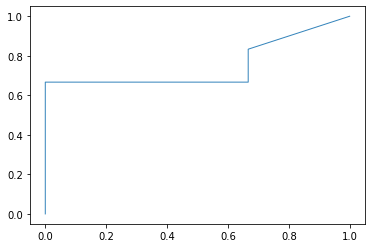

In [59]:
fpr, tpr, thresholds = roc_curve(actual_rating, pred_rating)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=1, alpha=0.9,
         label='ROC AUC = %0.2f)' % (roc_auc))



In [55]:
auc(fpr, tpr)

0.75